In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

2025-05-14 15:23:21.581337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 15:23:21.588184: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 15:23:21.620673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-14 15:23:21.658818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-14 15:23:21.675398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-14 15:23:21.719886: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Classification

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

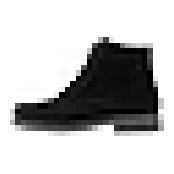

In [4]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[42], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka", "sandał", "koszula", "półbut", "torba", "but"]
class_names[y_train[42]]

'but'

In [6]:
# Creating sequential model

model_clf = keras.models.Sequential()

model_clf.add(keras.layers.Flatten(input_shape=(28, 28)))
model_clf.add(keras.layers.Dense(300, activation="relu"))
model_clf.add(keras.layers.Dense(100, activation="relu"))
model_clf.add(keras.layers.Dense(10, activation="softmax"))

model_clf.summary()

/home/piotrp/miniconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1747229006.362463    9226 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-14 15:23:26.363249: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_clf.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir()

In [9]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [10]:
history = model_clf.fit(X_train, y_train, 
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6761 - loss: 1.0248 - val_accuracy: 0.8105 - val_loss: 0.5342
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8224 - loss: 0.5073 - val_accuracy: 0.8205 - val_loss: 0.4943
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8422 - loss: 0.4489 - val_accuracy: 0.8453 - val_loss: 0.4444
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8517 - loss: 0.4230 - val_accuracy: 0.8495 - val_loss: 0.4177
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8604 - loss: 0.3980 - val_accuracy: 0.8553 - val_loss: 0.4182
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8701 - loss: 0.3747 - val_accuracy: 0.8512 - val_loss: 0.4117
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8713 - loss: 0.3618 - val_accuracy: 0.8652 - val_loss: 0.3762
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8751 - loss: 0.3512 - 

In [11]:
# %load_ext tensorboard
# %tensorboard --logdir=./image_logs

Reusing TensorBoard on port 6006 (pid 5118), started 2:07:57 ago. (Use '!kill 5118' to kill it.)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: sukienka
Confidence: 0.9998111
Truth: sukienka


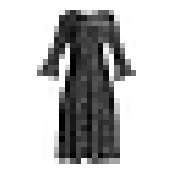

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: sukienka
Confidence: 0.98058975
Truth: sukienka


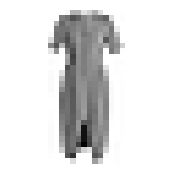

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: pulower
Confidence: 0.8908505
Truth: pulower


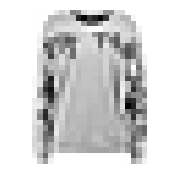

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: półbut
Confidence: 0.9942684
Truth: półbut


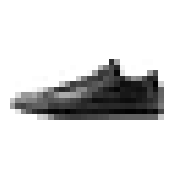

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: sandał
Confidence: 0.94452405
Truth: sandał


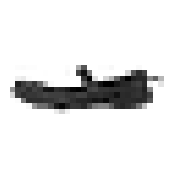

In [12]:
for i in range(5):
    image_index = np.random.randint(len(X_test))
    image = np.array([X_test[image_index]])
    confidences = model_clf.predict(image)
    confidence = np.max(confidences[0])
    prediction = np.argmax(confidences[0])
    print("Prediction:", class_names[prediction])
    print("Confidence:", confidence)
    print("Truth:", class_names[y_test[image_index]])
    plt.figure(figsize = (2,2))
    plt.imshow(image[0], cmap="binary")
    plt.axis('off')
    plt.show()

In [13]:
model_clf.save("fashion_clf.keras")

In [14]:
# Regression

housing = fetch_california_housing()

X = housing.data
y = housing.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

In [15]:
# Creating model

normalizer = keras.layers.Normalization(input_shape=[X_train.shape[1]])
normalizer.adapt(X_train)

model_reg = keras.models.Sequential([
                        normalizer,
                        keras.layers.Dense(50, activation="relu"),
                        keras.layers.Dense(50, activation="relu"),
                        keras.layers.Dense(50, activation="relu"),
                        keras.layers.Dense(1)
])

model_reg.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

model_reg.summary()

/home/piotrp/miniconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [16]:
es = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

root_logdir = os.path.join(os.curdir, "housing_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [17]:
history = model_reg.fit(X_train, y_train, 
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[es, tensorboard_cb])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6477 - rmse: 1.2454 - val_loss: 0.4261 - val_rmse: 0.6528
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4239 - rmse: 0.6508 - val_loss: 0.3643 - val_rmse: 0.6036
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4012 - rmse: 0.6332 - val_loss: 0.3363 - val_rmse: 0.5799
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3594 - rmse: 0.5995 - val_loss: 0.3222 - val_rmse: 0.5677
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3366 - rmse: 0.5801 - val_loss: 0.3425 - val_rmse: 0.5852
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3354 - rmse: 0.5791 - val_loss: 0.3060 - val_rmse: 0.5531
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3141 - rmse: 0.5604 - val_loss: 0.3041 - val_rmse: 0.5514
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3112 - rmse: 0.5578 - val_loss: 0.3703 - val_rmse: 0.6085
Epoch 9/100
413/413 ━━━━━━━━━━━━

In [18]:
# %load_ext tensorboard
# %tensorboard --logdir=./housing_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
model_reg.save("reg_housing_1.keras")

In [20]:
# Other combinations

# 1
model_reg1 = keras.models.Sequential([
                        normalizer,
                        keras.layers.Dense(30, activation="relu"),
                        keras.layers.Dense(30, activation="relu"),
                        keras.layers.Dense(20, activation="relu"),
                        keras.layers.Dense(10, activation="relu"),
                        keras.layers.Dense(1)
])

model_reg1.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model_reg1.fit(X_train, y_train, 
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[es, tensorboard_cb])

model_reg1.summary()

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8149 - rmse: 1.3171 - val_loss: 0.4313 - val_rmse: 0.6567
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5998 - rmse: 0.7690 - val_loss: 0.4225 - val_rmse: 0.6500
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3922 - rmse: 0.6262 - val_loss: 0.3733 - val_rmse: 0.6110
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3580 - rmse: 0.5983 - val_loss: 0.3563 - val_rmse: 0.5969
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3469 - rmse: 0.5888 - val_loss: 0.3481 - val_rmse: 0.5900
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3605 - rmse: 0.6002 - val_loss: 0.3310 - val_rmse: 0.5753
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3510 - rmse: 0.5923 - val_loss: 0.3369 - val_rmse: 0.5804
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3351 - rmse: 0.5787 - val_loss: 0.3206 - val_rmse: 0.5662
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,142 (24.00 KB)

 Trainable params: 2,041 (7.97 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 4,084 (15.96 KB)

In [21]:
# %load_ext tensorboard
# %tensorboard --logdir=./housing_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11954), started 0:00:14 ago. (Use '!kill 11954' to kill it.)

In [22]:
# 2
model_reg2 = keras.models.Sequential([
                        normalizer,
                        keras.layers.Dense(100, activation="relu"),
                        keras.layers.Dense(1)
])

model_reg2.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model_reg2.fit(X_train, y_train, 
                    epochs=150,
                    validation_data=(X_val, y_val),
                    callbacks=[es, tensorboard_cb])

model_reg2.summary()

Epoch 1/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9152 - rmse: 1.3486 - val_loss: 0.5273 - val_rmse: 0.7261
Epoch 2/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5464 - rmse: 0.7375 - val_loss: 0.4213 - val_rmse: 0.6491
Epoch 3/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4411 - rmse: 0.6640 - val_loss: 0.3920 - val_rmse: 0.6261
Epoch 4/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3962 - rmse: 0.6292 - val_loss: 0.3756 - val_rmse: 0.6129
Epoch 5/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3988 - rmse: 0.6315 - val_loss: 0.3677 - val_rmse: 0.6064
Epoch 6/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3863 - rmse: 0.6215 - val_loss: 0.3734 - val_rmse: 0.6110
Epoch 7/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3733 - rmse: 0.6105 - val_loss: 0.3531 - val_rmse: 0.5942
Epoch 8/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3822 - rmse: 0.6180 - val_loss: 0.3471 - val_rmse: 0.5891
Epoch 9/150
413/413 ━━━━━━━━━━━━

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,022 (11.81 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 2,004 (7.83 KB)

In [23]:
# %load_ext tensorboard
# %tensorboard --logdir=./housing_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11954), started 0:00:27 ago. (Use '!kill 11954' to kill it.)

In [24]:
model_reg1.save("reg_housing_2.keras")
model_reg2.save("reg_housing_3.keras")